In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
student_stats = pd.read_csv("C:/Users/Hp Pc/Downloads/Student_performance_data _.csv")

In [4]:
student_stats


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


DATA EXPLORATION

In [5]:
pd.isnull(student_stats).sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

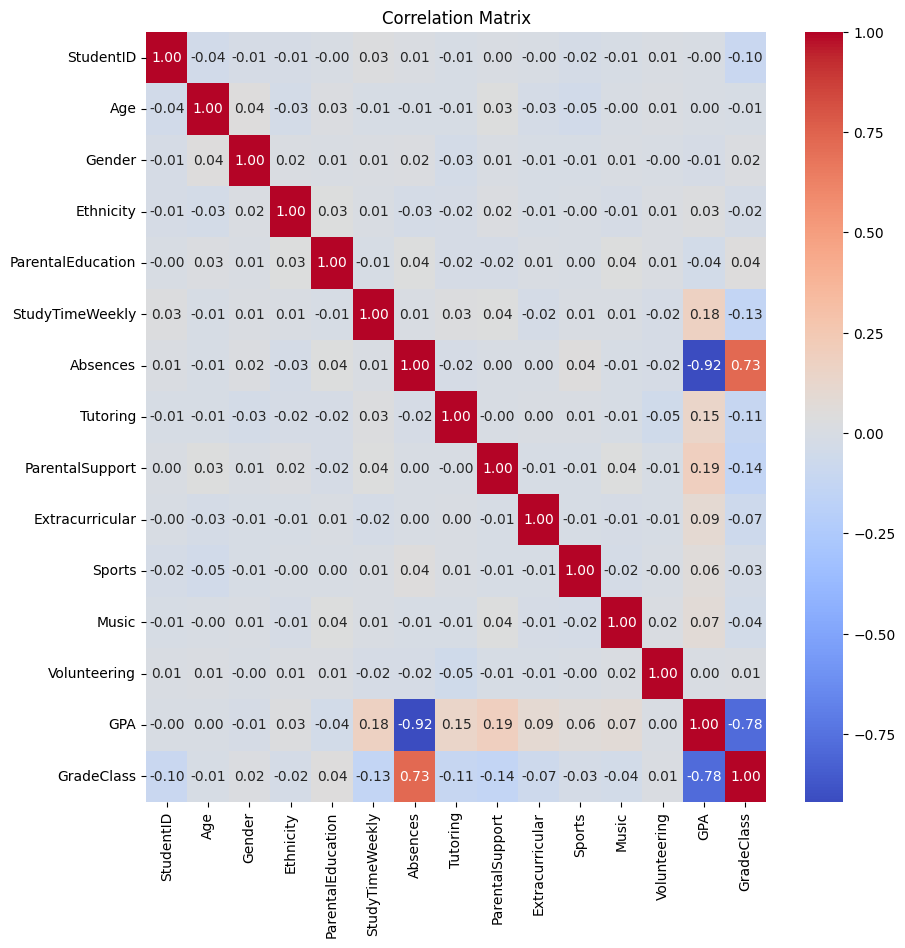

In [124]:
correlation = student_stats.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
gender_based_absentees = student_stats.groupby("Gender")['Absences'].sum()

Text(0.5, 1.0, 'Absentees by Gender')

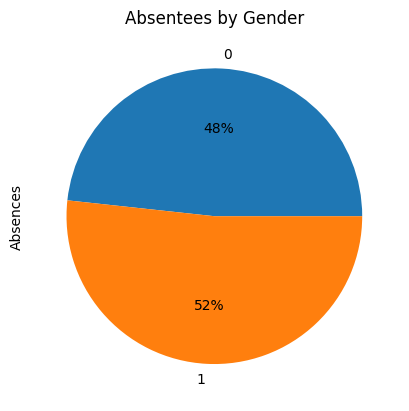

In [126]:
gender_based_absentees.plot(kind ="pie", autopct ='%1.0f%%')
plt.title("Absentees by Gender")

In [10]:
gender_based_studytime = student_stats.groupby("Gender")['StudyTimeWeekly'].mean()

Text(0.5, 1.0, 'Average Study Time by Gender')

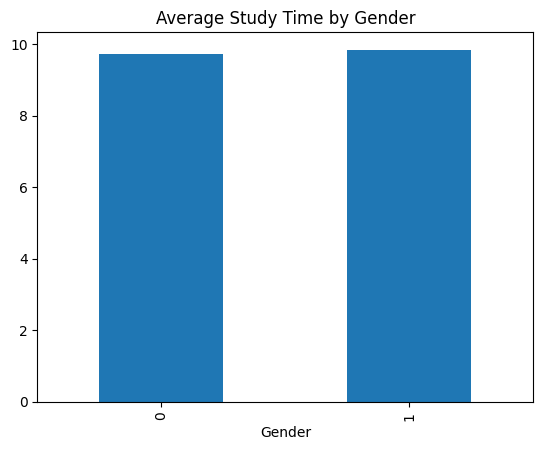

In [129]:
gender_based_studytime.plot(kind = "bar")
plt.title('Average Study Time by Gender')

In [144]:
parent_supports = student_stats.groupby("Gender")['ParentalSupport'].mean()

<Axes: xlabel='Gender'>

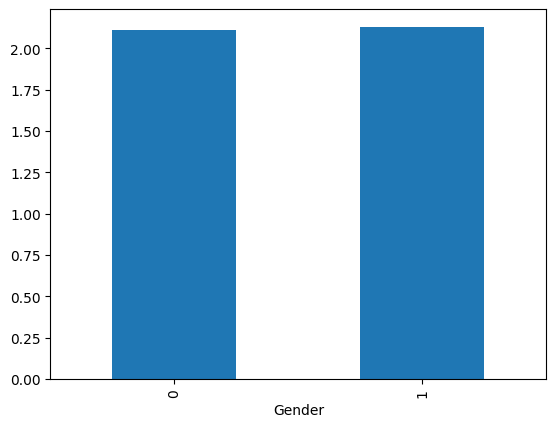

In [145]:
parent_supports.plot(kind="bar")


Text(0.5, 1.0, 'Distribution of Parental Support By Gender')

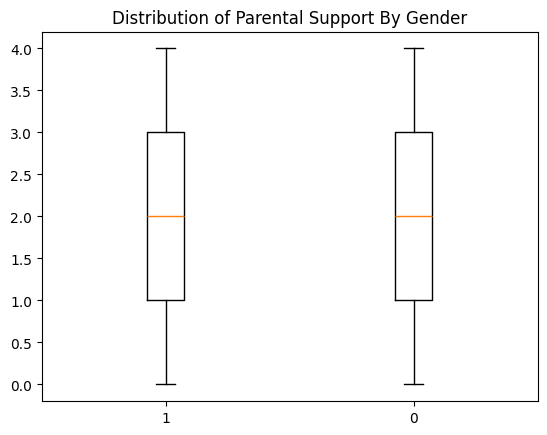

In [146]:
plt.boxplot(
    [student_stats[student_stats['Gender'] == i]['ParentalSupport'] for i in student_stats['Gender'].unique()],
tick_labels = student_stats['Gender'].unique())

plt.title('Distribution of Parental Support By Gender')

In [17]:
#age-based analysis

age_based_absentees = student_stats.groupby("Age")['Absences'].mean()
age_based_studytime = student_stats.groupby("Age")['StudyTimeWeekly'].mean()
parent_support_age = student_stats.groupby("Age")['ParentalSupport'].mean()

<Axes: xlabel='Age'>

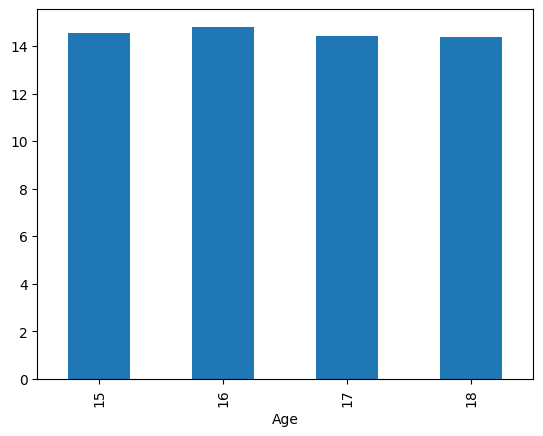

In [18]:
age_based_absentees.plot(kind='bar')

<Axes: ylabel='StudyTimeWeekly'>

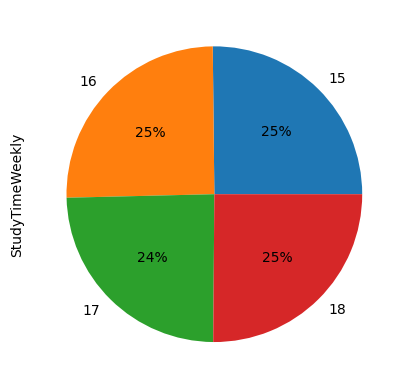

In [147]:
age_based_studytime.plot(kind='pie' , autopct ="%1.0f%%")

<Axes: ylabel='ParentalSupport'>

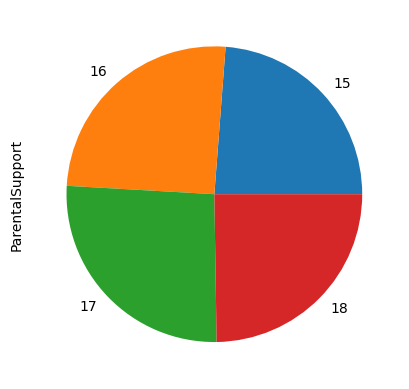

In [20]:
parent_support_age.plot(kind='pie')

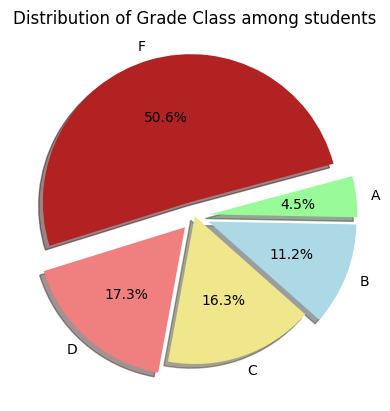

In [149]:
plt.pie(
    student_stats['GradeClass'].value_counts(),
    labels=['F','D','C','B','A'],
    autopct="%1.1f%%",
    startangle=15,
    shadow=True,
    colors=["firebrick", "lightcoral", "khaki","lightblue","palegreen"],
    explode=(0.1, 0.1, 0, 0.1, 0.1),
)
plt.title('Distribution of Grade Class among students')
plt.show()

MACHINE LEARNING MODELLING

In [73]:
student_stats.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [74]:
student_stats['GPA'].unique()

array([2.92919559, 3.04291483, 0.11260225, ..., 1.14233288, 1.80329676,
       2.14001388])

In [75]:
student_stats.GradeClass.unique()

array([2., 1., 4., 3., 0.])

In [76]:
grade = student_stats.groupby('GradeClass')['GPA'].count()

In [77]:
grade

GradeClass
0.0     107
1.0     269
2.0     391
3.0     414
4.0    1211
Name: GPA, dtype: int64

In [78]:
perf = student_stats.groupby('GradeClass')['GPA'].mean()

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering']

target = ['GradeClass']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(
    student_stats[features], student_stats[target],test_size=0.3, random_state=0 )


Hst = HistGradientBoostingRegressor(max_depth=5, random_state=0) #monotonic_const is not defined!
model = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", Hst)]
)

In [152]:
x_train.shape, x_test.shape

((1674, 12), (718, 12))

In [153]:
y_train.shape, y_test.shape

((1674, 1), (718, 1))

In [154]:
model.fit(x_train, y_train)

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 HistGradientBoostingRegressor(max_depth=5, random_state=0))])

In [155]:
prediction = model.predict(x_test)

In [156]:
prediction = pd.Series(prediction)

FIRST METRIC

In [ ]:
#precision_score(y_test, prediction, average=None, labels= student_stats['GradeClass'].unique())

In [ ]:
#print(f1_score(y_test, prediction, average=None,  labels = student_stats['GradeClass'].unique()))
#print(student_stats['GradeClass'].unique())

#precision_score is almost the same with in predicting unique GradeClasses

In [160]:
print(f"Regression_Mean Error: {mean_absolute_error(y_test, prediction)}")

Regression_Mean Error: 0.47622323355509766


In [162]:
print(f'R2_score: {r2_score(y_test, prediction)}')

#Predictions are not highly tallying with True Samples

R2_score: 0.6405834386010332


IDENTIFYING IMPORTANT FEATURES..#Without monotonic consts

In [163]:
from sklearn.inspection import permutation_importance

def find_permutation(model, predictors, target, column_name):
    train_impt = permutation_importance(
    model, predictors, target, random_state = 0, n_repeats = 42, n_jobs = 2
    )
    
    train_num = train_impt['importances_mean'].reshape(-1,1)
    train_num = pd.DataFrame(train_num, columns = column_name)

    features = predictors.columns
    features = pd.DataFrame(features, columns = ['features'])

    train_features = pd.concat([features, train_num], axis =1)
    top_train_features = train_features.sort_values(column_name, ascending=False).head(10)
    least_train_features = train_features.sort_values(column_name, ascending=False).tail(10)

    return top_train_features, least_train_features

In [164]:
important_train_features, least_important_features = find_permutation(
    model, student_stats[features], student_stats[target], ['train']
)

In [165]:
important_train_features

,features,train
5,Absences,1.290539
4,StudyTimeWeekly,0.099016
7,ParentalSupport,0.067805
6,Tutoring,0.043185
8,Extracurricular,0.027912
9,Sports,0.017202
2,Ethnicity,0.011837
3,ParentalEducation,0.010133
0,Age,0.009899
10,Music,0.007102


In [166]:
least_important_features

,features,train
7,ParentalSupport,0.067805
6,Tutoring,0.043185
8,Extracurricular,0.027912
9,Sports,0.017202
2,Ethnicity,0.011837
3,ParentalEducation,0.010133
0,Age,0.009899
10,Music,0.007102
11,Volunteering,0.005501
1,Gender,0.004612


In [170]:
student_stats.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [174]:
x_train.columns


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

MODELLING WITH MONOTONIC CONSTANT

In [176]:
#assign positive int to features that offer improvement to GradeClass

mono = { "Age":0,
        "Gender": 0,
        "Ethnicity":0,
        "ParentalEducation": 0,
        "StudyTimeWeekly" : 1,
        "Absences":-1,
        "Tutoring": 1,
        "ParentalSupport": 1,
        "Extracurricular": 1,
        "Sports": 1,
        "Music": 1,
        "Volunteering":0
}

mono_cst = [ mono.get(features,0)for features in x_train.columns]

In [177]:
mono_cst

[0, 0, 0, 0, 1, -1, 1, 1, 1, 1, 1, 0]

In [190]:
x_train, x_test, y_train, y_test = train_test_split(
    student_stats[features], student_stats[target],test_size=0.3, random_state=0 )


HstG = HistGradientBoostingRegressor(max_depth=5, random_state=0, monotonic_cst =mono_cst) #monotonic_const is defined!
model2 = Pipeline([
    ("scaler", StandardScaler()),
    ("est", HstG)]
)

In [191]:
model2.fit(x_train,y_train)

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('est',
                 HistGradientBoostingRegressor(max_depth=5,
                                               monotonic_cst=[0, 0, 0, 0, 1, -1,
                                                              1, 1, 1, 1, 1,
                                                              0],
                                               random_state=0))])

In [192]:
preds = model2.predict(x_test)

In [193]:
preds = pd.Series(preds)

#Metrics

error = mean_absolute_error(y_test, preds)
R2_score_2 = r2_score(y_test, preds)
print(f"Regression_mean Error: {error}")
print(f"2nd_R2_score: {R2_score_2}")


Regression_mean Error: 1.0865068736697268
2nd_R2_score: -0.08529200047294783


In [194]:
top_mono_cst_features, least_mono_cst_features = find_permutation(
    model2, student_stats[features], student_stats[target], ['train'])

In [195]:
top_mono_cst_features

,features,train
3,ParentalEducation,0.076324
2,Ethnicity,0.058854
0,Age,0.049273
1,Gender,0.018545
11,Volunteering,0.018041
4,StudyTimeWeekly,0.004511
9,Sports,0.003799
6,Tutoring,0.001480
8,Extracurricular,0.000525
7,ParentalSupport,0.000414


In [196]:
least_mono_cst_features

,features,train
0,Age,0.049273
1,Gender,0.018545
11,Volunteering,0.018041
4,StudyTimeWeekly,0.004511
9,Sports,0.003799
6,Tutoring,0.001480
8,Extracurricular,0.000525
7,ParentalSupport,0.000414
10,Music,0.000397
5,Absences,0.000000
